# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

### SGD

In [7]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


W0809 20:38:10.513565 15508 deprecation_wrapper.py:119] From C:\Users\an_fl\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0809 20:38:10.514558 15508 deprecation_wrapper.py:119] From C:\Users\an_fl\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0809 20:38:10.574590 15508 deprecation_wrapper.py:119] From C:\Users\an_fl\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0809 20:38:10.576557 15508 deprecation_wrapper.py:119] From C:\Users\an_fl\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0809 20:38:10.580029 15508 

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.8170 - acc: 0.3499 - val_loss: 1.6604 - val_acc: 0.4132
Epoch 2/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.5997 - acc: 0.4298 - val_loss: 1.5428 - val_acc: 0.4512
Epoch 3/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.5116 - acc: 0.4626 - val_loss: 1.4979 - val_acc: 0.4655
Epoch 4/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.4547 - acc: 0.4834 - val_loss: 1.5123 - val_acc: 0.4625
Epoch 5/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.3984 - acc: 0.5028 - val_loss: 1.5959 - val_acc: 0.4411
Epoch 6/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.3639 - acc: 0.5151 - val_loss: 1.4749 - val_acc: 0.4747
Epoch 7/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.3277 - acc: 0.5292 - val_loss: 1.3828 - 

Epoch 2/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.8070 - acc: 0.3660 - val_loss: 1.7608 - val_acc: 0.3802
Epoch 3/50
50000/50000 [==============================] - 11s 222us/step - loss: 1.7243 - acc: 0.3941 - val_loss: 1.6927 - val_acc: 0.4064
Epoch 4/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.6671 - acc: 0.4168 - val_loss: 1.6459 - val_acc: 0.4213
Epoch 5/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.6224 - acc: 0.4303 - val_loss: 1.6153 - val_acc: 0.4331
Epoch 6/50
50000/50000 [==============================] - 11s 222us/step - loss: 1.5844 - acc: 0.4439 - val_loss: 1.5803 - val_acc: 0.4424
Epoch 7/50
50000/50000 [==============================] - 11s 218us/step - loss: 1.5508 - acc: 0.4571 - val_loss: 1.5558 - val_acc: 0.4567
Epoch 8/50
50000/50000 [==============================] - 11s 222us/step - loss: 1.5201 - acc: 0.4656 - val_loss: 1.5320 - val_acc: 0.4607
Epoch 9/50
50000/50000 [===

Epoch 3/50
50000/50000 [==============================] - 11s 221us/step - loss: 2.0616 - acc: 0.2888 - val_loss: 2.0288 - val_acc: 0.2974
Epoch 4/50
50000/50000 [==============================] - 11s 225us/step - loss: 2.0030 - acc: 0.3058 - val_loss: 1.9781 - val_acc: 0.3086
Epoch 5/50
50000/50000 [==============================] - 11s 210us/step - loss: 1.9588 - acc: 0.3191 - val_loss: 1.9395 - val_acc: 0.3227
Epoch 6/50
50000/50000 [==============================] - 11s 216us/step - loss: 1.9244 - acc: 0.3320 - val_loss: 1.9088 - val_acc: 0.3376
Epoch 7/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.8961 - acc: 0.3409 - val_loss: 1.8837 - val_acc: 0.3414
Epoch 8/50
50000/50000 [==============================] - 11s 218us/step - loss: 1.8724 - acc: 0.3503 - val_loss: 1.8627 - val_acc: 0.3514
Epoch 9/50
50000/50000 [==============================] - 11s 222us/step - loss: 1.8526 - acc: 0.3557 - val_loss: 1.8435 - val_acc: 0.3575
Epoch 10/50
50000/50000 [==

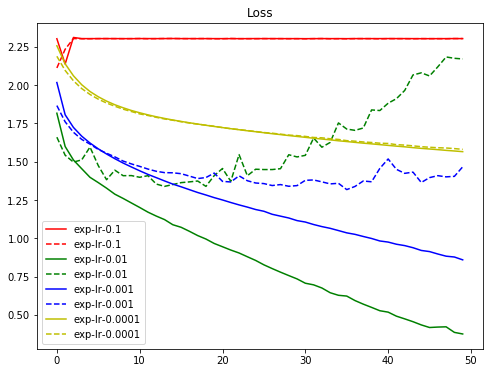

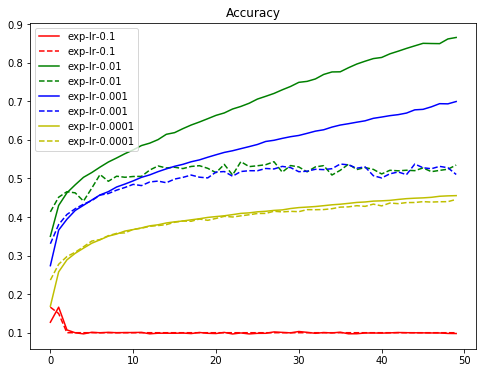

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

### RMSprop

In [11]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.RMSprop(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 236us/step - loss: 14.4530 - acc: 0.0995 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 11s 227us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 11s 227us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 11s 226us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 11s 229us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 11s 228us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 11s 226us/step - loss: 14.5063 - acc: 0.1000 -

50000/50000 [==============================] - 12s 241us/step - loss: 2.3089 - acc: 0.2166 - val_loss: 1.9679 - val_acc: 0.2798
Epoch 2/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.8822 - acc: 0.3175 - val_loss: 1.8143 - val_acc: 0.3293
Epoch 3/50
50000/50000 [==============================] - 12s 231us/step - loss: 1.7857 - acc: 0.3554 - val_loss: 1.8643 - val_acc: 0.3312
Epoch 4/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.7147 - acc: 0.3861 - val_loss: 1.7135 - val_acc: 0.3887
Epoch 5/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.6583 - acc: 0.4066 - val_loss: 1.6078 - val_acc: 0.4173
Epoch 6/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.6069 - acc: 0.4274 - val_loss: 1.8063 - val_acc: 0.3577
Epoch 7/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.5711 - acc: 0.4380 - val_loss: 1.7040 - val_acc: 0.3907
Epoch 8/50
50000/50000 [==============

50000/50000 [==============================] - 8s 153us/step - loss: 1.7825 - acc: 0.3653 - val_loss: 1.7139 - val_acc: 0.3926
Epoch 3/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.7054 - acc: 0.3993 - val_loss: 1.7034 - val_acc: 0.4017
Epoch 4/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.6498 - acc: 0.4168 - val_loss: 1.6476 - val_acc: 0.4194
Epoch 5/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.6093 - acc: 0.4304 - val_loss: 1.6788 - val_acc: 0.4077
Epoch 6/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.5747 - acc: 0.4426 - val_loss: 1.6377 - val_acc: 0.4194
Epoch 7/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.5413 - acc: 0.4559 - val_loss: 1.7504 - val_acc: 0.3898
Epoch 8/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.5140 - acc: 0.4661 - val_loss: 1.5435 - val_acc: 0.4456
Epoch 9/50
50000/50000 [=====================

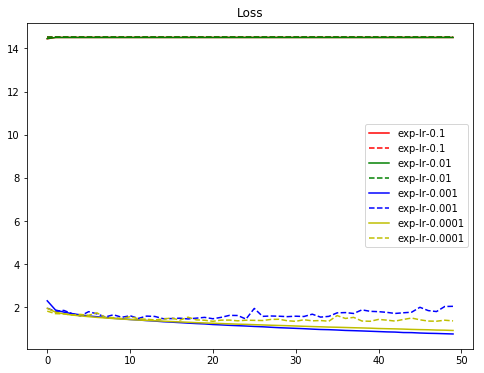

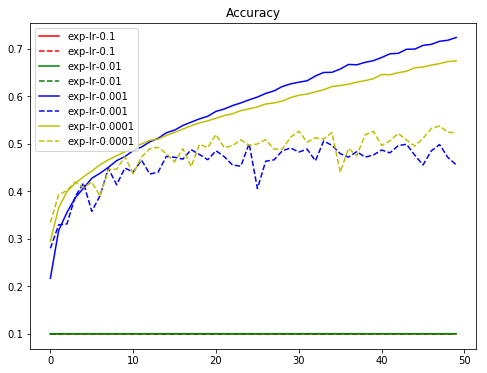

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

### AdaGrad

In [14]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adagrad(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 130us/step - loss: 14.4437 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 6s 126us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 6s 127us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 6s 127us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 6s 128us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 6s 128us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 6s 129us/step - loss: 14.5063 - acc: 0.1000 - val_lo

50000/50000 [==============================] - 7s 141us/step - loss: 1.9839 - acc: 0.2880 - val_loss: 1.9588 - val_acc: 0.2713
Epoch 2/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.7929 - acc: 0.3676 - val_loss: 1.9126 - val_acc: 0.2988
Epoch 3/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.7237 - acc: 0.3940 - val_loss: 1.7518 - val_acc: 0.3756
Epoch 4/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.6742 - acc: 0.4123 - val_loss: 1.7072 - val_acc: 0.4005
Epoch 5/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.6378 - acc: 0.4258 - val_loss: 1.6649 - val_acc: 0.4115
Epoch 6/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.6100 - acc: 0.4369 - val_loss: 1.6190 - val_acc: 0.4316
Epoch 7/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.5841 - acc: 0.4464 - val_loss: 1.6043 - val_acc: 0.4318
Epoch 8/50
50000/50000 [=====================

50000/50000 [==============================] - 7s 139us/step - loss: 1.9638 - acc: 0.3178 - val_loss: 1.9345 - val_acc: 0.3261
Epoch 3/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.9141 - acc: 0.3360 - val_loss: 1.8988 - val_acc: 0.3394
Epoch 4/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.8836 - acc: 0.3467 - val_loss: 1.8747 - val_acc: 0.3474
Epoch 5/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.8609 - acc: 0.3543 - val_loss: 1.8531 - val_acc: 0.3539
Epoch 6/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.8430 - acc: 0.3588 - val_loss: 1.8380 - val_acc: 0.3628
Epoch 7/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.8285 - acc: 0.3651 - val_loss: 1.8250 - val_acc: 0.3644
Epoch 8/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.8165 - acc: 0.3692 - val_loss: 1.8149 - val_acc: 0.3690
Epoch 9/50
50000/50000 [=====================

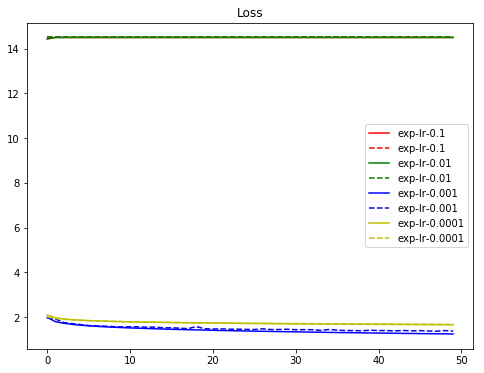

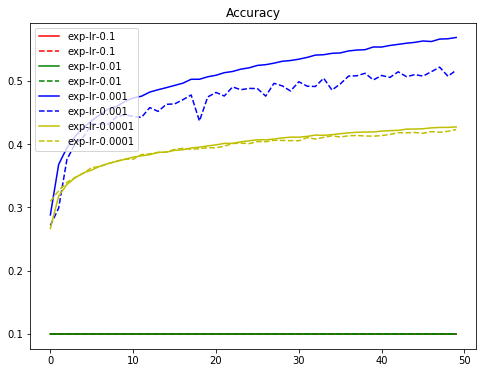

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

### Adam

In [16]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 172us/step - loss: 14.4408 - acc: 0.1001 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 8s 163us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 8s 164us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 8s 164us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 8s 163us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 8s 163us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 8s 163us/step - loss: 14.5063 - acc: 0.1000 - val_lo

50000/50000 [==============================] - 10s 209us/step - loss: 1.9408 - acc: 0.3042 - val_loss: 1.7927 - val_acc: 0.3616
Epoch 2/50
50000/50000 [==============================] - 9s 190us/step - loss: 1.7154 - acc: 0.3854 - val_loss: 1.7064 - val_acc: 0.3899
Epoch 3/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.6141 - acc: 0.4231 - val_loss: 1.6120 - val_acc: 0.4255
Epoch 4/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.5555 - acc: 0.4440 - val_loss: 1.5579 - val_acc: 0.4453
Epoch 5/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.5011 - acc: 0.4664 - val_loss: 1.5121 - val_acc: 0.4621
Epoch 6/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.4614 - acc: 0.4791 - val_loss: 1.4817 - val_acc: 0.4678
Epoch 7/50
50000/50000 [==============================] - 10s 191us/step - loss: 1.4278 - acc: 0.4901 - val_loss: 1.4654 - val_acc: 0.4760
Epoch 8/50
50000/50000 [===================

50000/50000 [==============================] - 9s 171us/step - loss: 1.7228 - acc: 0.3948 - val_loss: 1.6655 - val_acc: 0.4198
Epoch 3/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.6394 - acc: 0.4237 - val_loss: 1.6359 - val_acc: 0.4229
Epoch 4/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.5917 - acc: 0.4386 - val_loss: 1.5970 - val_acc: 0.4375
Epoch 5/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.5486 - acc: 0.4554 - val_loss: 1.5463 - val_acc: 0.4506
Epoch 6/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.5088 - acc: 0.4690 - val_loss: 1.5124 - val_acc: 0.4605
Epoch 7/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.4744 - acc: 0.4782 - val_loss: 1.4774 - val_acc: 0.4784
Epoch 8/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.4451 - acc: 0.4912 - val_loss: 1.4709 - val_acc: 0.4779
Epoch 9/50
50000/50000 [=====================

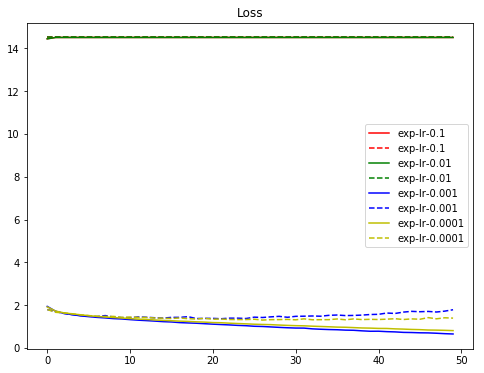

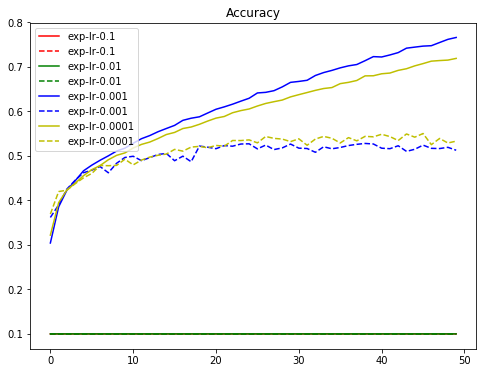

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()